#### 1. Make a new variable that loads the Titanic dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Titanic.csv')

In [2]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 2. Calculate the class distribution on survival on Titanic dataset. 

In [4]:
total_survived = df.Survived.sum()
print('Percentage of class distribution on survival on Titanic Dataset:\n')
round(df[df.Survived == 1].groupby('Pclass').count().Survived / total_survived * 100, 1)

Percentage of class distribution on survival on Titanic Dataset:



Pclass
1    39.8
2    25.4
3    34.8
Name: Survived, dtype: float64

#### 3. Find the skewness on the data set. 

In [5]:
# Label encoding columns 'Sex' and 'Embarked'
df['Sex'] = df['Sex'].apply(lambda g: 0 if g == 'male' else 1)
df['Embarked'] = df['Embarked'].apply(lambda e: 0 if e == 'S' else 1 if e == 'C' else 2)

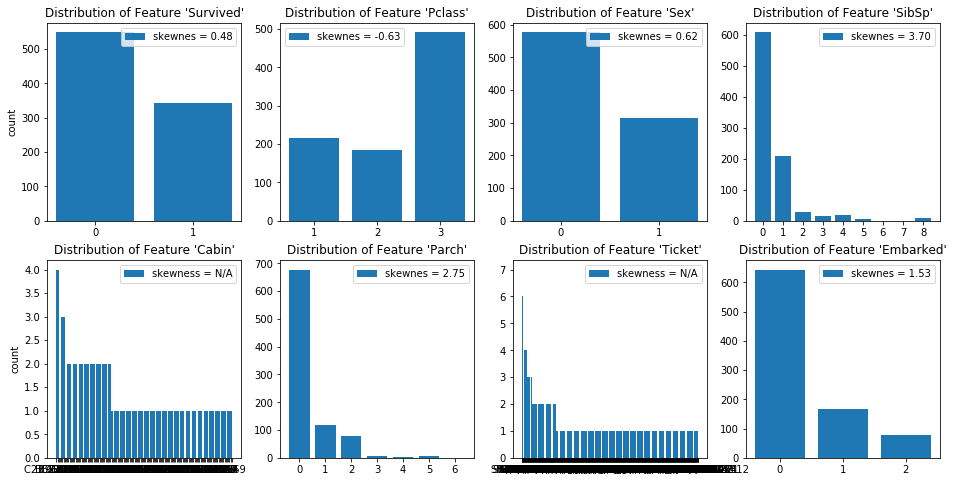

In [6]:
cat_features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Cabin', 'Parch', 'Ticket', 'Embarked']

fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(16, 8)

for k, feature in enumerate(cat_features):
    ax = axes[k // 4][k % 4]
    x = df[feature].value_counts().index
    y = df[feature].value_counts()
    if feature in ['Cabin', 'Ticket']:
        label = 'skewness = N/A'
    else:
        label = 'skewnes = {:.2f}'.format(df[feature].skew())
    ax.bar(x, y, label=label)
    ax.set_title("Distribution of Feature '{}'".format(feature))
    ax.legend()
    
    if k % 4 == 0:
        ax.set_ylabel('count')
        
    try:
        ax.set_xticks(np.arange(np.min(x), np.max(x) + 1))
    except:
        continue

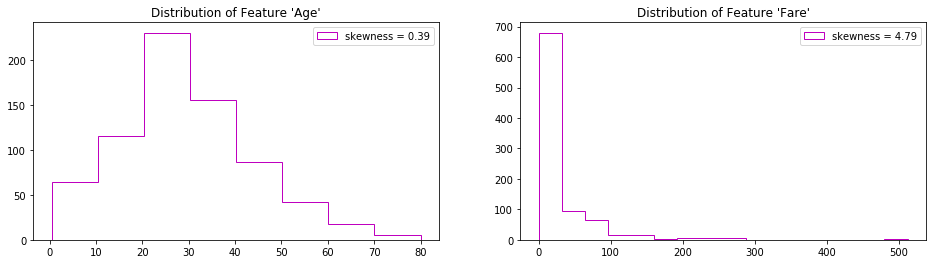

In [7]:
import warnings
warnings.filterwarnings('ignore')
numerical_features = ['Age', 'Fare']
bins = [8, 16]
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16, 4)

for k, feature in enumerate(numerical_features):
    ax = axes[k]
    ax.hist(df[feature], bins=bins[k], histtype='step', color='m', label='skewness = {:.2f}'\
            .format(df[feature].skew()))
    ax.set_title("Distribution of Feature '{}'".format(feature))
    ax.legend()

#### 4. Use Pearson data correlation between the data set. 
Due to the Pearson score of the pair (SibSp, Survived) is closed to 0 and lowest, feature Sibsp can be the first candidate to be dropped.

In [8]:
corr_features = ['Age', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Survived']

abs(round(df[corr_features].corr(method='pearson'), 2))

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived
Age,1.00,0.10,0.19,0.37,0.09,0.31,0.08
Fare,0.10,1.00,0.22,0.55,0.18,0.16,0.26
Parch,0.19,0.22,1.00,0.02,0.25,0.41,0.08
Pclass,0.37,0.55,0.02,1.00,0.13,0.08,0.34
Sex,0.09,0.18,0.25,0.13,1.00,0.11,0.54
SibSp,0.31,0.16,0.41,0.08,0.11,1.00,0.04
Survived,0.08,0.26,0.08,0.34,0.54,0.04,1.00


#### 5. Run a Chi-squared test between Sex and Survived columns. 

In [9]:
from scipy.stats import chi2, chi2_contingency 

probability = .95
table = pd.crosstab(df.Sex, df.Survived)
print(table)
chi2_test, p, dof, expected_freq = chi2_contingency(table)
critical_value = chi2.ppf(probability, dof)

print('\nThe test statistics:', chi2_test)
print('\np value: ', p)
print('\nThe degree of freedom:', dof)
print('\nThe expected frequencies:\n', expected_freq)
print('\nCritical value:', critical_value)

if chi2_test < critical_value:
    test_result = '\nSex and Survived are independent (fail to reject Null hypothesis).'
else:
    test_result = '\nSex and Survived are dependent (reject Null hypothesis).'

print(test_result)


Survived    0    1
Sex               
0         468  109
1          81  233

The test statistics: 260.71702016732104

p value:  1.1973570627755645e-58

The degree of freedom: 1

The expected frequencies:
 [[355.52525253 221.47474747]
 [193.47474747 120.52525253]]

Critical value: 3.841458820694124

Sex and Survived are dependent (reject Null hypothesis).
